In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/GUIDE_Test.csv")
df.head()

<ipython-input-23-9f9620fb96b6>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/GUIDE_Test.csv")


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [ ]:
df.shape

(4147992, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [24]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 50])  # Show columns >50% missing

MitreTechniques      55.619779
ActionGrouped        99.953881
ActionGranular       99.953881
EmailClusterId       98.994526
ThreatFamily         99.243538
ResourceType         99.927820
Roles                97.380058
AntispamDirection    98.155469
SuspicionLevel       84.333745
LastVerdict          76.067167
dtype: float64


In [25]:
df.drop(["MitreTechniques","ActionGrouped","ActionGranular","EmailClusterId","ThreatFamily","ResourceType","Roles","AntispamDirection","SuspicionLevel","LastVerdict"], axis =1 , inplace = True)

In [ ]:
df.isnull().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0


In [26]:
df.duplicated().sum()

225297

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

In [29]:
df["Day"]=df["Timestamp"].dt.day
df["Month"]=df["Timestamp"].dt.month
df["Year"]=df["Timestamp"].dt.year
df["Hour"]=df["Timestamp"].dt.hour
df["Time"]=df["Timestamp"].dt.time

In [30]:
df = df.drop(columns=['Timestamp'])

#Data visualization

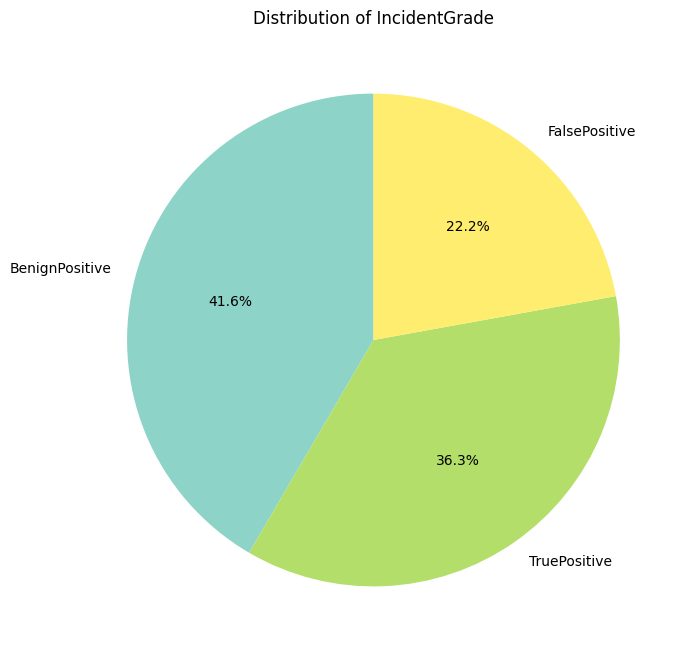

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Pie chart for 'IncidentGrade'
incident_grade_counts = df['IncidentGrade'].value_counts()
plt.figure(figsize=(8, 8))
incident_grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribution of IncidentGrade')
plt.ylabel('')
plt.show()

In [ ]:
df["Month"].unique()

array([ 6,  5,  1,  2,  3,  4, 12, 11], dtype=int32)

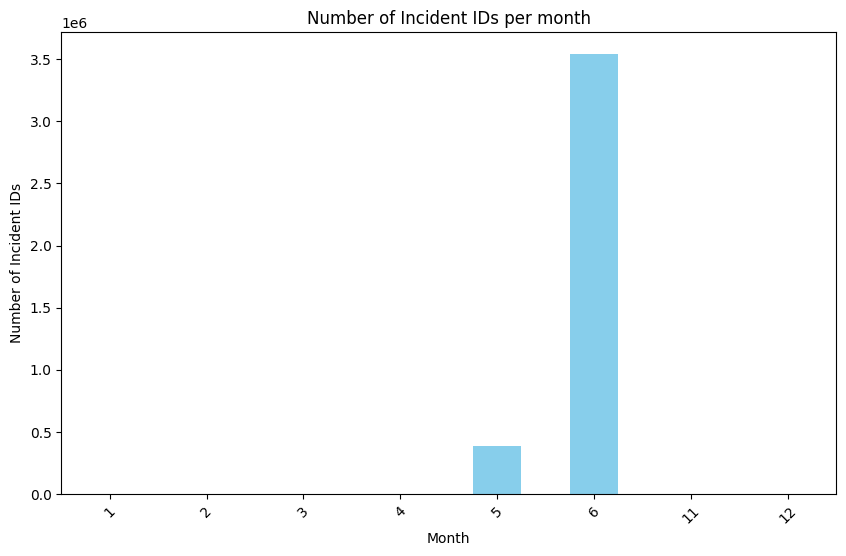

In [ ]:
# Grouping data to count the number of IncidentIds per Year
yearly_incident_counts = df.groupby('Month')['IncidentId'].count()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
yearly_incident_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Incident IDs per month')
plt.xlabel('Month')
plt.ylabel('Number of Incident IDs')
plt.xticks(rotation=45)
plt.show()

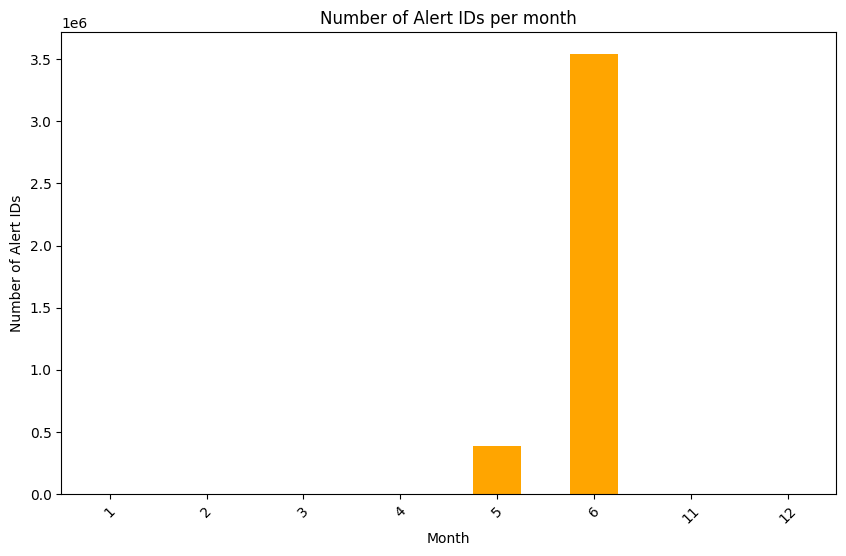

In [ ]:
# Grouping data to count the number of AlertIds per Year
yearly_alert_counts = df.groupby('Month')['AlertId'].count()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
yearly_alert_counts.plot(kind='bar', color='orange')
plt.title('Number of Alert IDs per month')
plt.xlabel('Month')
plt.ylabel('Number of Alert IDs')
plt.xticks(rotation=45)
plt.show()

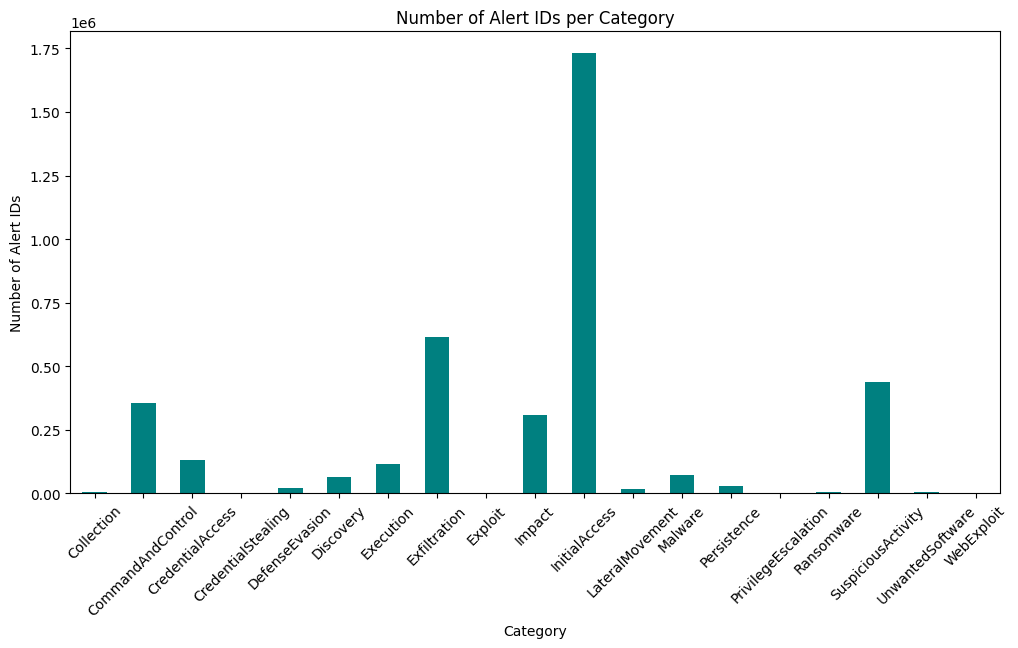

In [ ]:
# Grouping data to count the number of AlertIds per Category
category_alert_counts = df.groupby('Category')['AlertId'].count()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
category_alert_counts.plot(kind='bar', color='teal')
plt.title('Number of Alert IDs per Category')
plt.xlabel('Category')
plt.ylabel('Number of Alert IDs')
plt.xticks(rotation=45)
plt.show()

#encoding

In [ ]:
df.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Category','EntityType','IncidentGrade','EvidenceRole', 'Usage','State','City','DeviceName','AccountName',
       'Time']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

In [32]:
df.drop(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId','DeviceId','AccountObjectId','IpAddress','Sha256','Url','NetworkMessageId','OAuthApplicationId','ApplicationId'], axis =1 , inplace = True)

In [33]:
df.drop(['Usage'], axis =1 , inplace = True)
df.drop(['FileName','FolderPath'], axis =1 , inplace = True)

              Feature  Importance
0          AlertTitle    0.351201
22               Time    0.249368
1            Category    0.099343
18                Day    0.088064
4          AccountSid    0.055528
5          AccountUpn    0.049451
2          EntityType    0.025670
21               Hour    0.020843
6         AccountName    0.016736
7          DeviceName    0.014534
17               City    0.008701
11    ApplicationName    0.005484
15        CountryCode    0.004961
3        EvidenceRole    0.003154
16              State    0.002723
8         RegistryKey    0.002046
14          OSVersion    0.001021
19              Month    0.000722
12     ResourceIdName    0.000174
13           OSFamily    0.000133
9   RegistryValueName    0.000109
10  RegistryValueData    0.000026
20               Year    0.000006


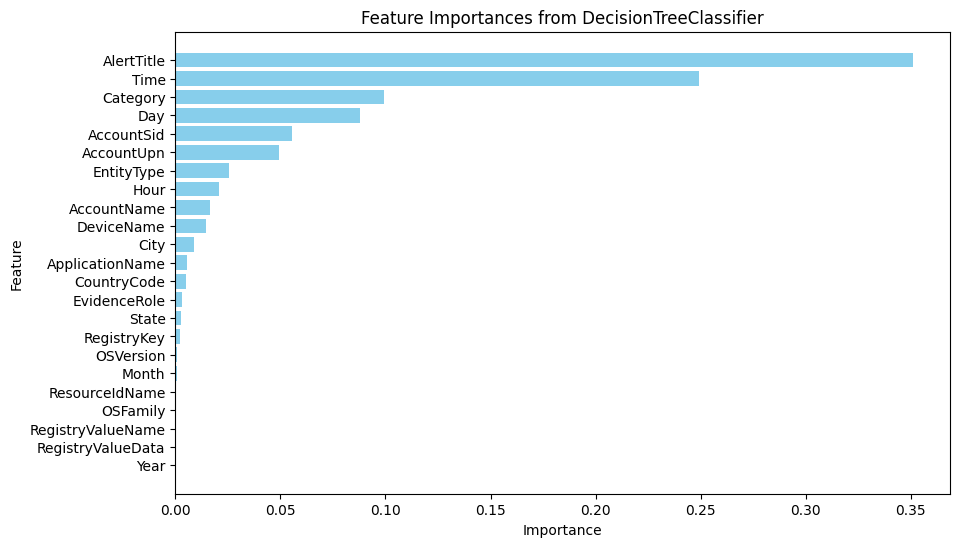

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Separate features (X) and target (y)
X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DecisionTreeClassifier')
plt.gca().invert_yaxis()  # Reverse the order for better visualization
plt.show()


In [35]:
df.drop(['Month','ApplicationName','OSVersion','RegistryKey','ResourceIdName','OSFamily','RegistryValueName','RegistryValueData','Year'], axis =1 , inplace = True)

#balancing data

In [ ]:
! pip install -U imbalanced-learn

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('IncidentGrade', axis=1)  # Features
y = df['IncidentGrade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [18]:
y_resampled.value_counts()

,count
IncidentGrade,
0,868897
1,868897
2,868897


In [39]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [20]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [40]:
models = {
     'Decision Tree': DecisionTreeClassifier(max_depth=5, max_features='sqrt',random_state=42),
    'XGBoost': XGBClassifier(n_jobs=-1, random_state=42),
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for model_name, model in models.items():
    print(f'Model: {model_name}')

    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)

    # Evaluateing the models
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)


    # Displaying the results of the modles
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(report)
    print('-' * 50)

Model: Decision Tree
Accuracy: 0.6180585031464337
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.80      0.68    326336
           1       0.43      0.34      0.38    173808
           2       0.81      0.58      0.68    284395

    accuracy                           0.62    784539
   macro avg       0.61      0.57      0.58    784539
weighted avg       0.63      0.62      0.61    784539

--------------------------------------------------
Model: XGBoost
Accuracy: 0.7833377308202651
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81    326336
           1       0.68      0.70      0.69    173808
           2       0.89      0.75      0.82    284395

    accuracy                           0.78    784539
   macro avg       0.78      0.77      0.77    784539
weighted avg       0.79      0.78      0.78    784539

-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.47225950526360067
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.24      0.35    326336
           1       0.32      0.22      0.26    173808
           2       0.47      0.89      0.62    284395

    accuracy                           0.47    784539
   macro avg       0.47      0.45      0.41    784539
weighted avg       0.50      0.47      0.43    784539

--------------------------------------------------
